In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
from scipy import stats
import pylab
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

In [69]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
pd.set_option('display.max_columns',None)

In [70]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [71]:
list(data.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [72]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [73]:
data.duplicated().sum()

0

In [74]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [75]:
data.Gender.value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

In [76]:
data.Gender = data.Gender.map({'Male':1,'Female':0})

In [77]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,0,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,1,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,1,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,0,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,0,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [78]:
data.EducationBackground.value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [79]:
data.loc[data['EducationBackground']=='Life Sciences','EducationBackground']=5
data.loc[data['EducationBackground']=='Medical','EducationBackground']=4
data.loc[data['EducationBackground']=='Marketing','EducationBackground']=3
data.loc[data['EducationBackground']=='Technical Degree','EducationBackground']=2
data.loc[data['EducationBackground']=='Other','EducationBackground']=1
data.loc[data['EducationBackground']=='Human Resources','EducationBackground']=0

In [80]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,0,4,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,1,5,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,1,4,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,0,4,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,0,5,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [81]:
data.MaritalStatus.value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [82]:
data.MaritalStatus = data.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [83]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,0,4,0,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,1,5,1,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,1,4,2,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,0,4,1,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,0,5,1,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [84]:
data.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [85]:
data.loc[data['EmpDepartment']=='Sales','EmpDepartment']=5
data.loc[data['EmpDepartment']=='Development','EmpDepartment']=4
data.loc[data['EmpDepartment']=='Research & Development','EmpDepartment']=3
data.loc[data['EmpDepartment']=='Human Resources','EmpDepartment']=2
data.loc[data['EmpDepartment']=='Finance','EmpDepartment']=1
data.loc[data['EmpDepartment']=='Data Science','EmpDepartment']=0

In [86]:
data.tail(10)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1190,E100983,23,1,4,2,4,Developer,Travel_Rarely,4,3,1,58,4,1,1,2,No,16,1,5,3,4,3,2,0,2,No,4
1191,E100985,25,1,5,2,5,Sales Executive,Travel_Rarely,8,3,4,57,4,2,2,0,No,22,3,4,4,3,3,2,1,2,No,4
1192,E100987,38,0,3,1,5,Sales Executive,Travel_Rarely,7,4,4,46,2,2,4,0,No,20,1,8,2,3,7,7,0,5,No,4
1193,E100988,29,1,5,0,4,Developer,Travel_Frequently,1,4,2,76,1,1,4,1,No,18,4,10,5,3,10,7,2,8,No,3
1194,E100990,48,1,3,2,5,Sales Executive,Travel_Rarely,2,1,2,56,4,2,2,3,No,12,4,12,3,3,2,2,2,2,No,3
1195,E100992,27,0,4,0,5,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,1,5,1,4,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,1,4,2,4,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,0,4,1,0,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,0,5,1,5,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [87]:
data.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [88]:
data.loc[data['EmpJobRole']=='Sales Executive','EmpJobRole']=18
data.loc[data['EmpJobRole']=='Developer','EmpJobRole']=17
data.loc[data['EmpJobRole']=='Manager R&D','EmpJobRole']=16
data.loc[data['EmpJobRole']=='Research Scientist','EmpJobRole']=15
data.loc[data['EmpJobRole']=='Sales Representative','EmpJobRole']=14
data.loc[data['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
data.loc[data['EmpJobRole']=='Senior Developer','EmpJobRole']=12
data.loc[data['EmpJobRole']=='Manager','EmpJobRole']=11
data.loc[data['EmpJobRole']=='Finance Manager','EmpJobRole']=10
data.loc[data['EmpJobRole']=='Human Resources','EmpJobRole']=9
data.loc[data['EmpJobRole']=='Technical Lead','EmpJobRole']=8
data.loc[data['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
data.loc[data['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
data.loc[data['EmpJobRole']=='Data Scientist','EmpJobRole']=5
data.loc[data['EmpJobRole']=='Research Director','EmpJobRole']=4
data.loc[data['EmpJobRole']=='Business Analyst','EmpJobRole']=3
data.loc[data['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
data.loc[data['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
data.loc[data['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [89]:
data.tail(10)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1190,E100983,23,1,4,2,4,17,Travel_Rarely,4,3,1,58,4,1,1,2,No,16,1,5,3,4,3,2,0,2,No,4
1191,E100985,25,1,5,2,5,18,Travel_Rarely,8,3,4,57,4,2,2,0,No,22,3,4,4,3,3,2,1,2,No,4
1192,E100987,38,0,3,1,5,18,Travel_Rarely,7,4,4,46,2,2,4,0,No,20,1,8,2,3,7,7,0,5,No,4
1193,E100988,29,1,5,0,4,17,Travel_Frequently,1,4,2,76,1,1,4,1,No,18,4,10,5,3,10,7,2,8,No,3
1194,E100990,48,1,3,2,5,18,Travel_Rarely,2,1,2,56,4,2,2,3,No,12,4,12,3,3,2,2,2,2,No,3
1195,E100992,27,0,4,0,5,18,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,1,5,1,4,12,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,1,4,2,4,12,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,0,4,1,0,5,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,0,5,1,5,18,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [90]:
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [91]:
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [92]:
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
2    846
1    222
0    132
Name: count, dtype: int64

In [93]:
data.OverTime.value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [94]:
data.OverTime = data.OverTime.map({'No':1,'Yes':0})

In [95]:
data.tail(10)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1190,E100983,23,1,4,2,4,17,2,4,3,1,58,4,1,1,2,1,16,1,5,3,4,3,2,0,2,No,4
1191,E100985,25,1,5,2,5,18,2,8,3,4,57,4,2,2,0,1,22,3,4,4,3,3,2,1,2,No,4
1192,E100987,38,0,3,1,5,18,2,7,4,4,46,2,2,4,0,1,20,1,8,2,3,7,7,0,5,No,4
1193,E100988,29,1,5,0,4,17,1,1,4,2,76,1,1,4,1,1,18,4,10,5,3,10,7,2,8,No,3
1194,E100990,48,1,3,2,5,18,2,2,1,2,56,4,2,2,3,1,12,4,12,3,3,2,2,2,2,No,3
1195,E100992,27,0,4,0,5,18,1,3,1,4,71,4,2,4,1,0,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,1,5,1,4,12,2,10,2,4,80,4,1,4,3,1,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,1,4,2,4,12,2,28,1,4,74,4,1,3,1,0,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,0,4,1,0,5,2,9,3,4,46,2,3,2,1,1,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,0,5,1,5,18,2,3,2,1,65,3,2,3,9,1,14,1,4,3,3,2,2,2,0,Yes,2


In [96]:
data.Attrition.value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [97]:
data.Attrition = data.Attrition.map({'No':1,'Yes':0})

In [98]:
data.head(10)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,3,1,5,18,2,10,3,4,55,3,2,4,1,1,12,4,10,2,2,10,7,0,8,1,3
1,E1001006,47,1,3,1,5,18,2,14,4,4,42,3,2,1,2,1,12,4,20,2,3,7,7,1,7,1,3
2,E1001007,40,1,5,2,5,18,1,5,4,4,48,2,3,1,5,0,21,3,20,2,3,18,13,1,12,1,4
3,E1001009,41,1,0,0,2,11,2,10,4,2,73,2,5,4,3,1,15,2,23,2,2,21,6,12,6,1,3
4,E1001010,60,1,3,1,5,18,2,16,4,1,84,3,2,1,8,1,14,4,10,1,3,2,2,2,2,1,3
5,E1001011,27,1,5,0,4,17,1,10,2,4,32,3,3,1,1,1,21,3,9,4,2,9,7,1,7,1,4
6,E1001016,50,1,3,2,5,14,2,8,4,4,54,3,1,2,7,1,15,4,4,2,3,2,2,2,2,1,3
7,E1001019,28,0,5,1,4,17,2,1,2,1,67,1,1,2,7,0,13,4,10,4,3,7,7,3,7,0,3
8,E1001020,36,0,5,2,4,17,0,8,3,1,63,4,3,1,9,1,14,1,10,2,3,8,7,0,5,1,3
9,E1001021,38,0,5,1,4,17,2,1,3,3,81,3,3,3,4,0,14,4,10,4,4,1,0,0,0,1,3


In [99]:
#data preprocessing is done
data.shape

(1200, 28)

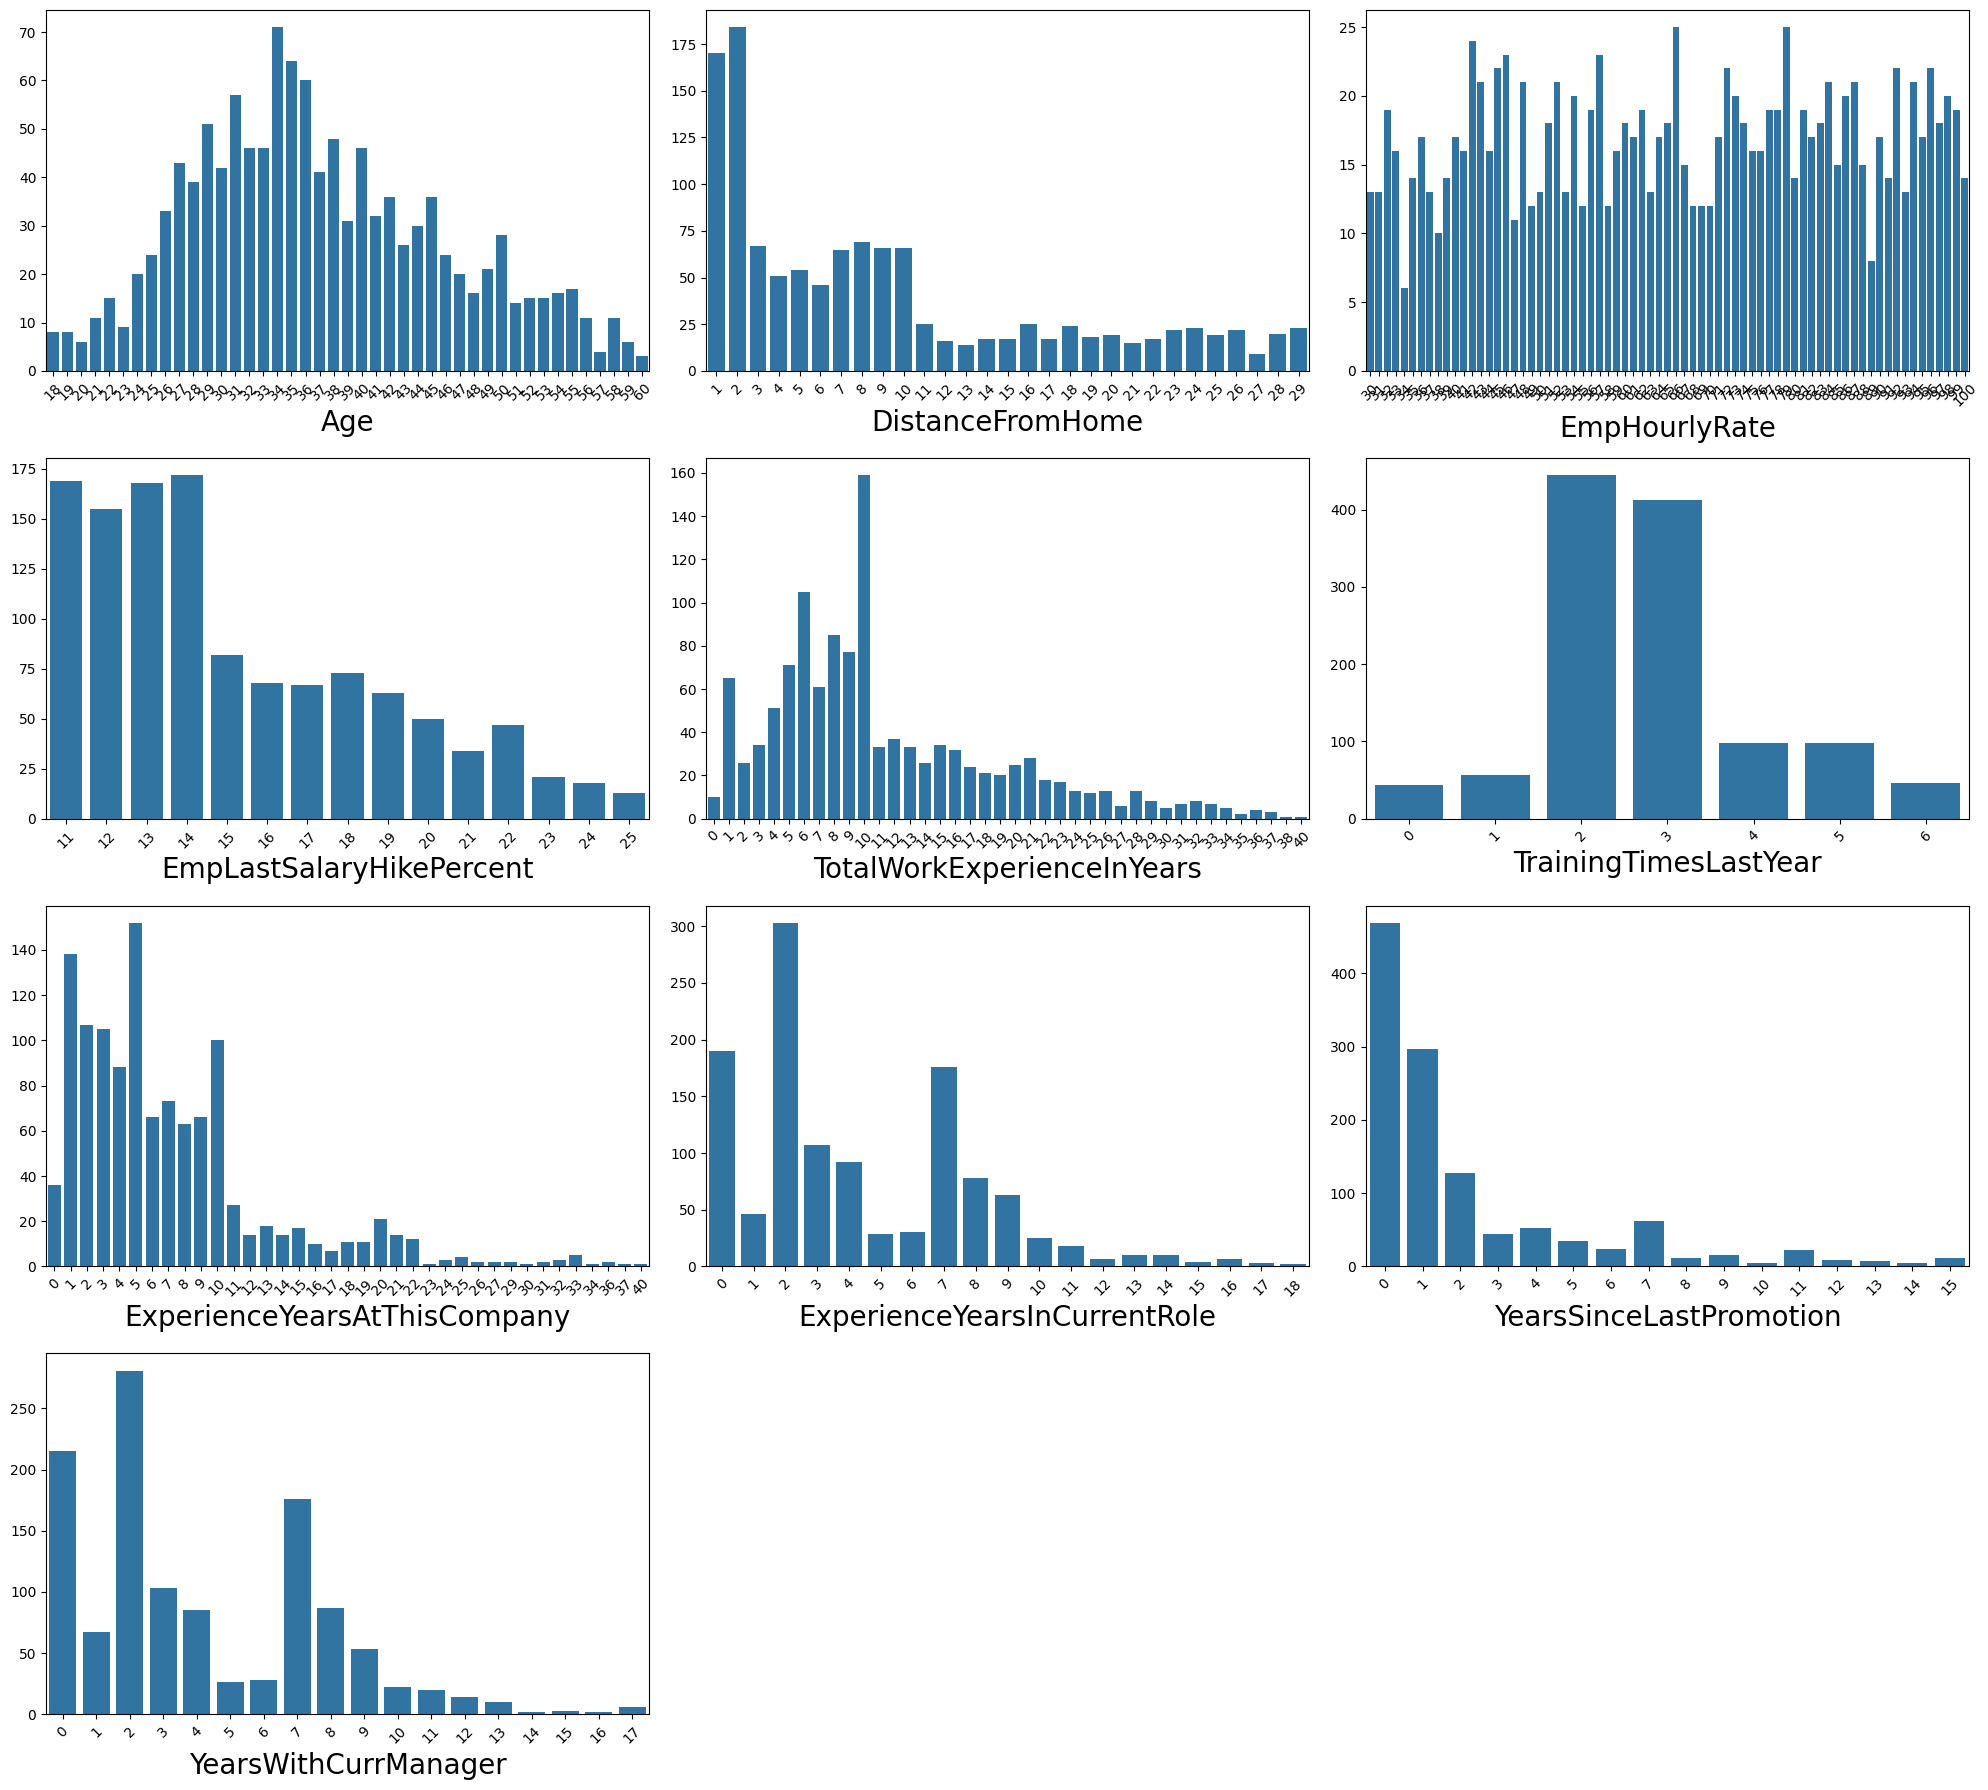

In [100]:
out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
            'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18))  
plotno = 1 

for column in out.columns:  # iteration of columns
    if plotno <= 10:  # set the limit
        plt.subplot(4, 3, plotno)  # plotting 10 graphs (4-rows, 3-columns)
        sns.barplot(x=out[column].value_counts().index, y=out[column].value_counts().values)
        plt.xlabel(column, fontsize=20)  # assigning name to x-axis with font size 20
        plt.xticks(rotation=45)  # rotating x-ticks for better readability
    plotno += 1  # counter increment

plt.tight_layout()
plt.show()

In [101]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [102]:
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

In [103]:
data.loc[data['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [104]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [105]:
data.loc[data['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

In [106]:
data.loc[data['TrainingTimesLastYear'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [107]:
data.loc[data['TrainingTimesLastYear'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [108]:
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [109]:
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [110]:
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [111]:
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [112]:
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()

In [113]:
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [114]:
iqr = stats.iqr(data['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [115]:
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [116]:
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [117]:
iqr = stats.iqr(data['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [118]:
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [119]:
data.loc[data['YearsWithCurrManager'] >max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


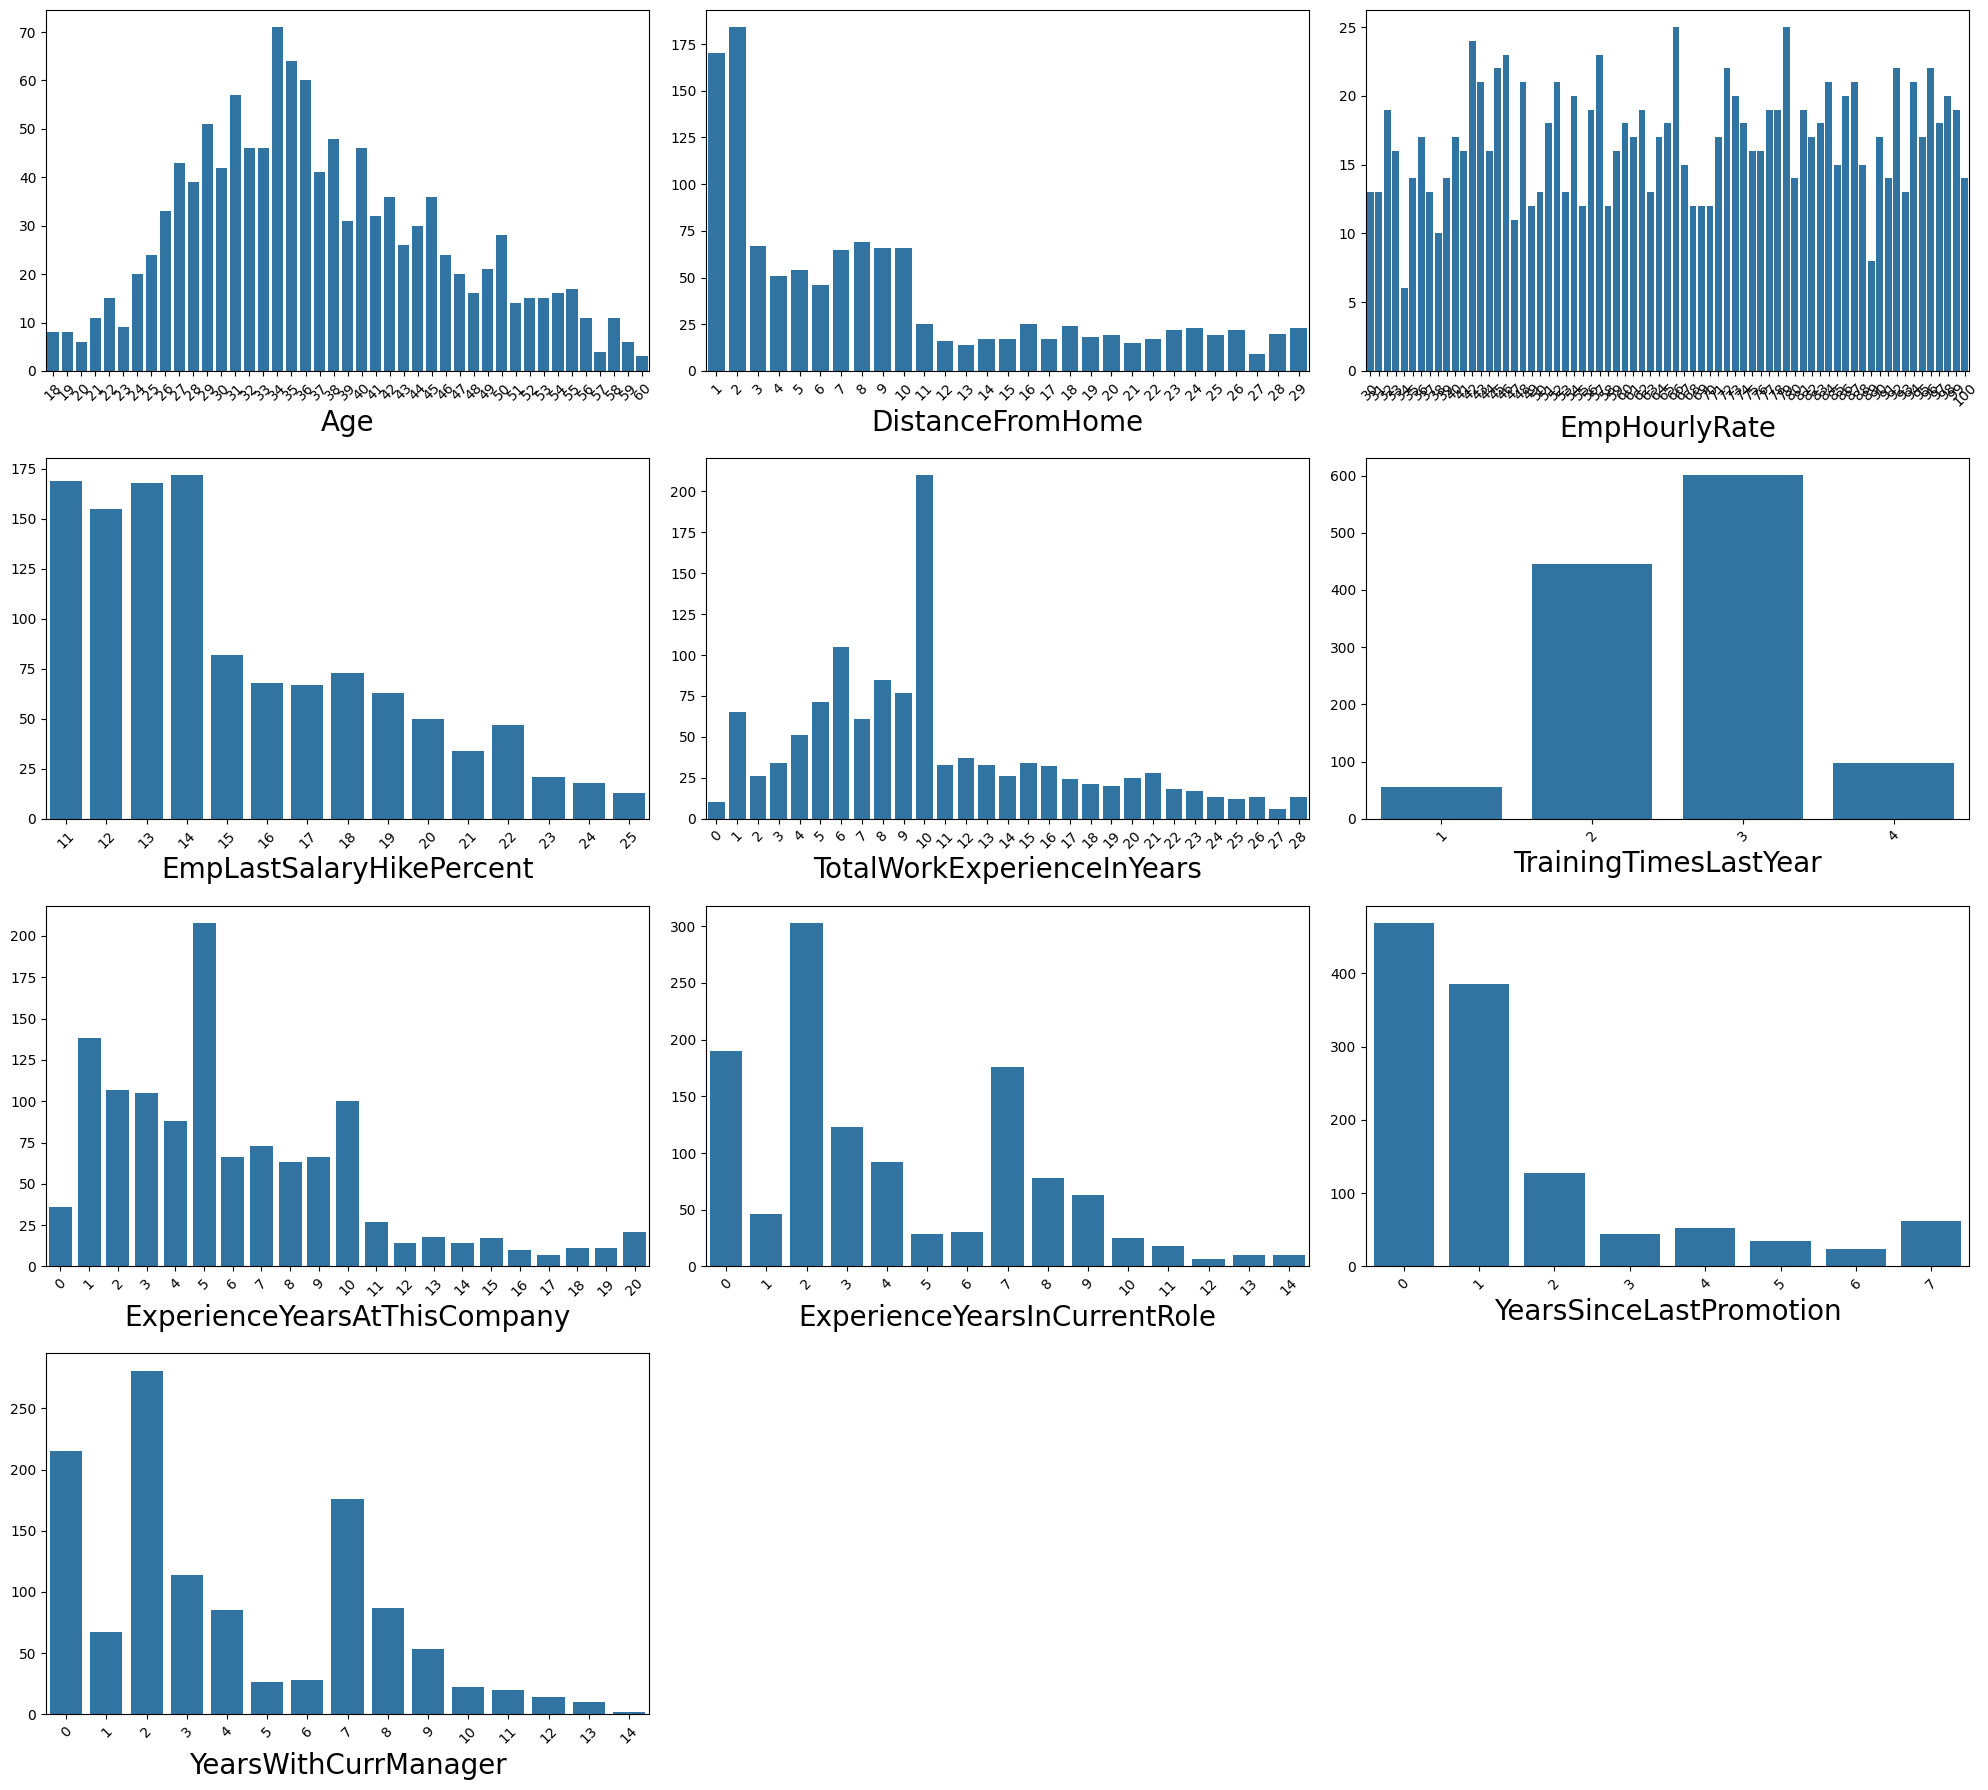

In [120]:
#recheck for outlier after processing

out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
            'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18))  
plotno = 1 

for column in out.columns:  # iteration of columns
    if plotno <= 10:  # set the limit
        plt.subplot(4, 3, plotno)  # plotting 10 graphs (4-rows, 3-columns)
        sns.barplot(x=out[column].value_counts().index, y=out[column].value_counts().values)
        plt.xlabel(column, fontsize=20)  # assigning name to x-axis with font size 20
        plt.xticks(rotation=45)  # rotating x-ticks for better readability
    plotno += 1  # counter increment

plt.tight_layout()
plt.show()

In [121]:
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

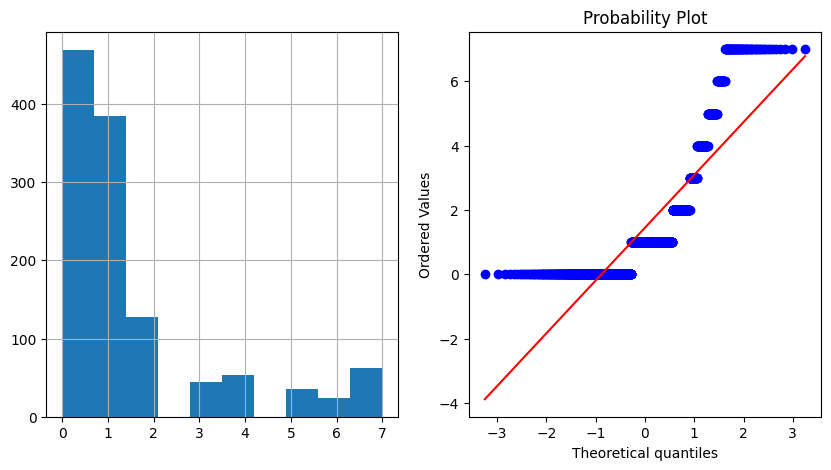

In [122]:
plot_data(data,'YearsSinceLastPromotion')

In [123]:
data['square_YearsSinceLastPromotion'] = data.YearsSinceLastPromotion**(1/2)

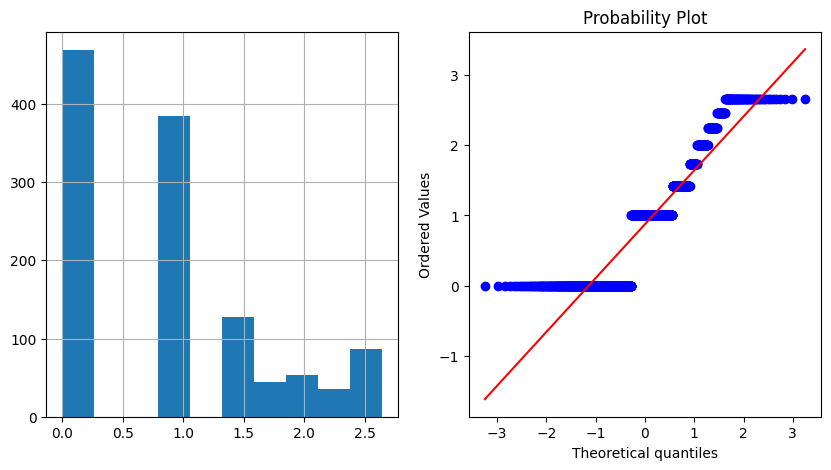

In [124]:
plot_data(data,'square_YearsSinceLastPromotion')

In [125]:
#scaling

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scalar.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','square_YearsSinceLastPromotion']])

In [126]:
data.head(10)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,E1001000,-0.541458,1,3,1,5,18,2,0.102061,3,4,-0.543569,3,2,4,1,1,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,0,1.202103,1,3,-1.057559
1,E1001006,1.109888,1,3,1,5,18,2,0.591464,4,4,-1.187042,3,2,1,2,1,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,1,0.902825,1,3,0.151501
2,E1001007,0.339260,1,5,2,5,18,1,-0.509693,4,4,-0.890055,2,3,1,5,0,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,1,2.399219,1,4,0.151501
3,E1001009,0.449349,1,0,0,2,11,2,0.102061,4,2,0.347393,2,5,4,3,1,-0.061389,2,1.984292,-0.879579,2,-0.244898,0.564498,1,0.603546,1,3,0.151501
4,E1001010,2.541054,1,3,1,5,18,2,0.836165,4,1,0.891870,3,2,1,8,1,-0.337297,4,-0.058535,-2.303999,3,-0.912803,-0.633905,2,-0.593570,1,3,0.652311
5,E1001011,-1.091906,1,5,0,4,17,1,0.102061,2,4,-1.682021,3,3,1,1,1,1.594054,3,-0.215675,1.969261,2,0.645641,0.864098,1,0.902825,1,4,0.151501
6,E1001016,1.440157,1,3,2,5,14,2,-0.142640,4,4,-0.593067,3,1,2,7,1,-0.061389,4,-1.001378,-0.879579,3,-0.912803,-0.633905,2,-0.593570,1,3,0.652311
7,E1001019,-0.981817,0,5,1,4,17,2,-0.999095,2,1,0.050405,1,1,2,7,0,-0.613204,4,-0.058535,1.969261,3,0.200371,0.864098,3,0.902825,0,3,1.036595
8,E1001020,-0.101099,0,5,2,4,17,0,-0.142640,3,1,-0.147586,4,3,1,9,1,-0.337297,1,-0.058535,-0.879579,3,0.423006,0.864098,0,0.304267,1,3,-1.057559
9,E1001021,0.119080,0,5,1,4,17,2,-0.999095,3,3,0.743376,3,3,3,4,0,-0.337297,4,-0.058535,1.969261,4,-1.135438,-1.233106,0,-1.192127,1,3,-1.057559


In [127]:
data.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

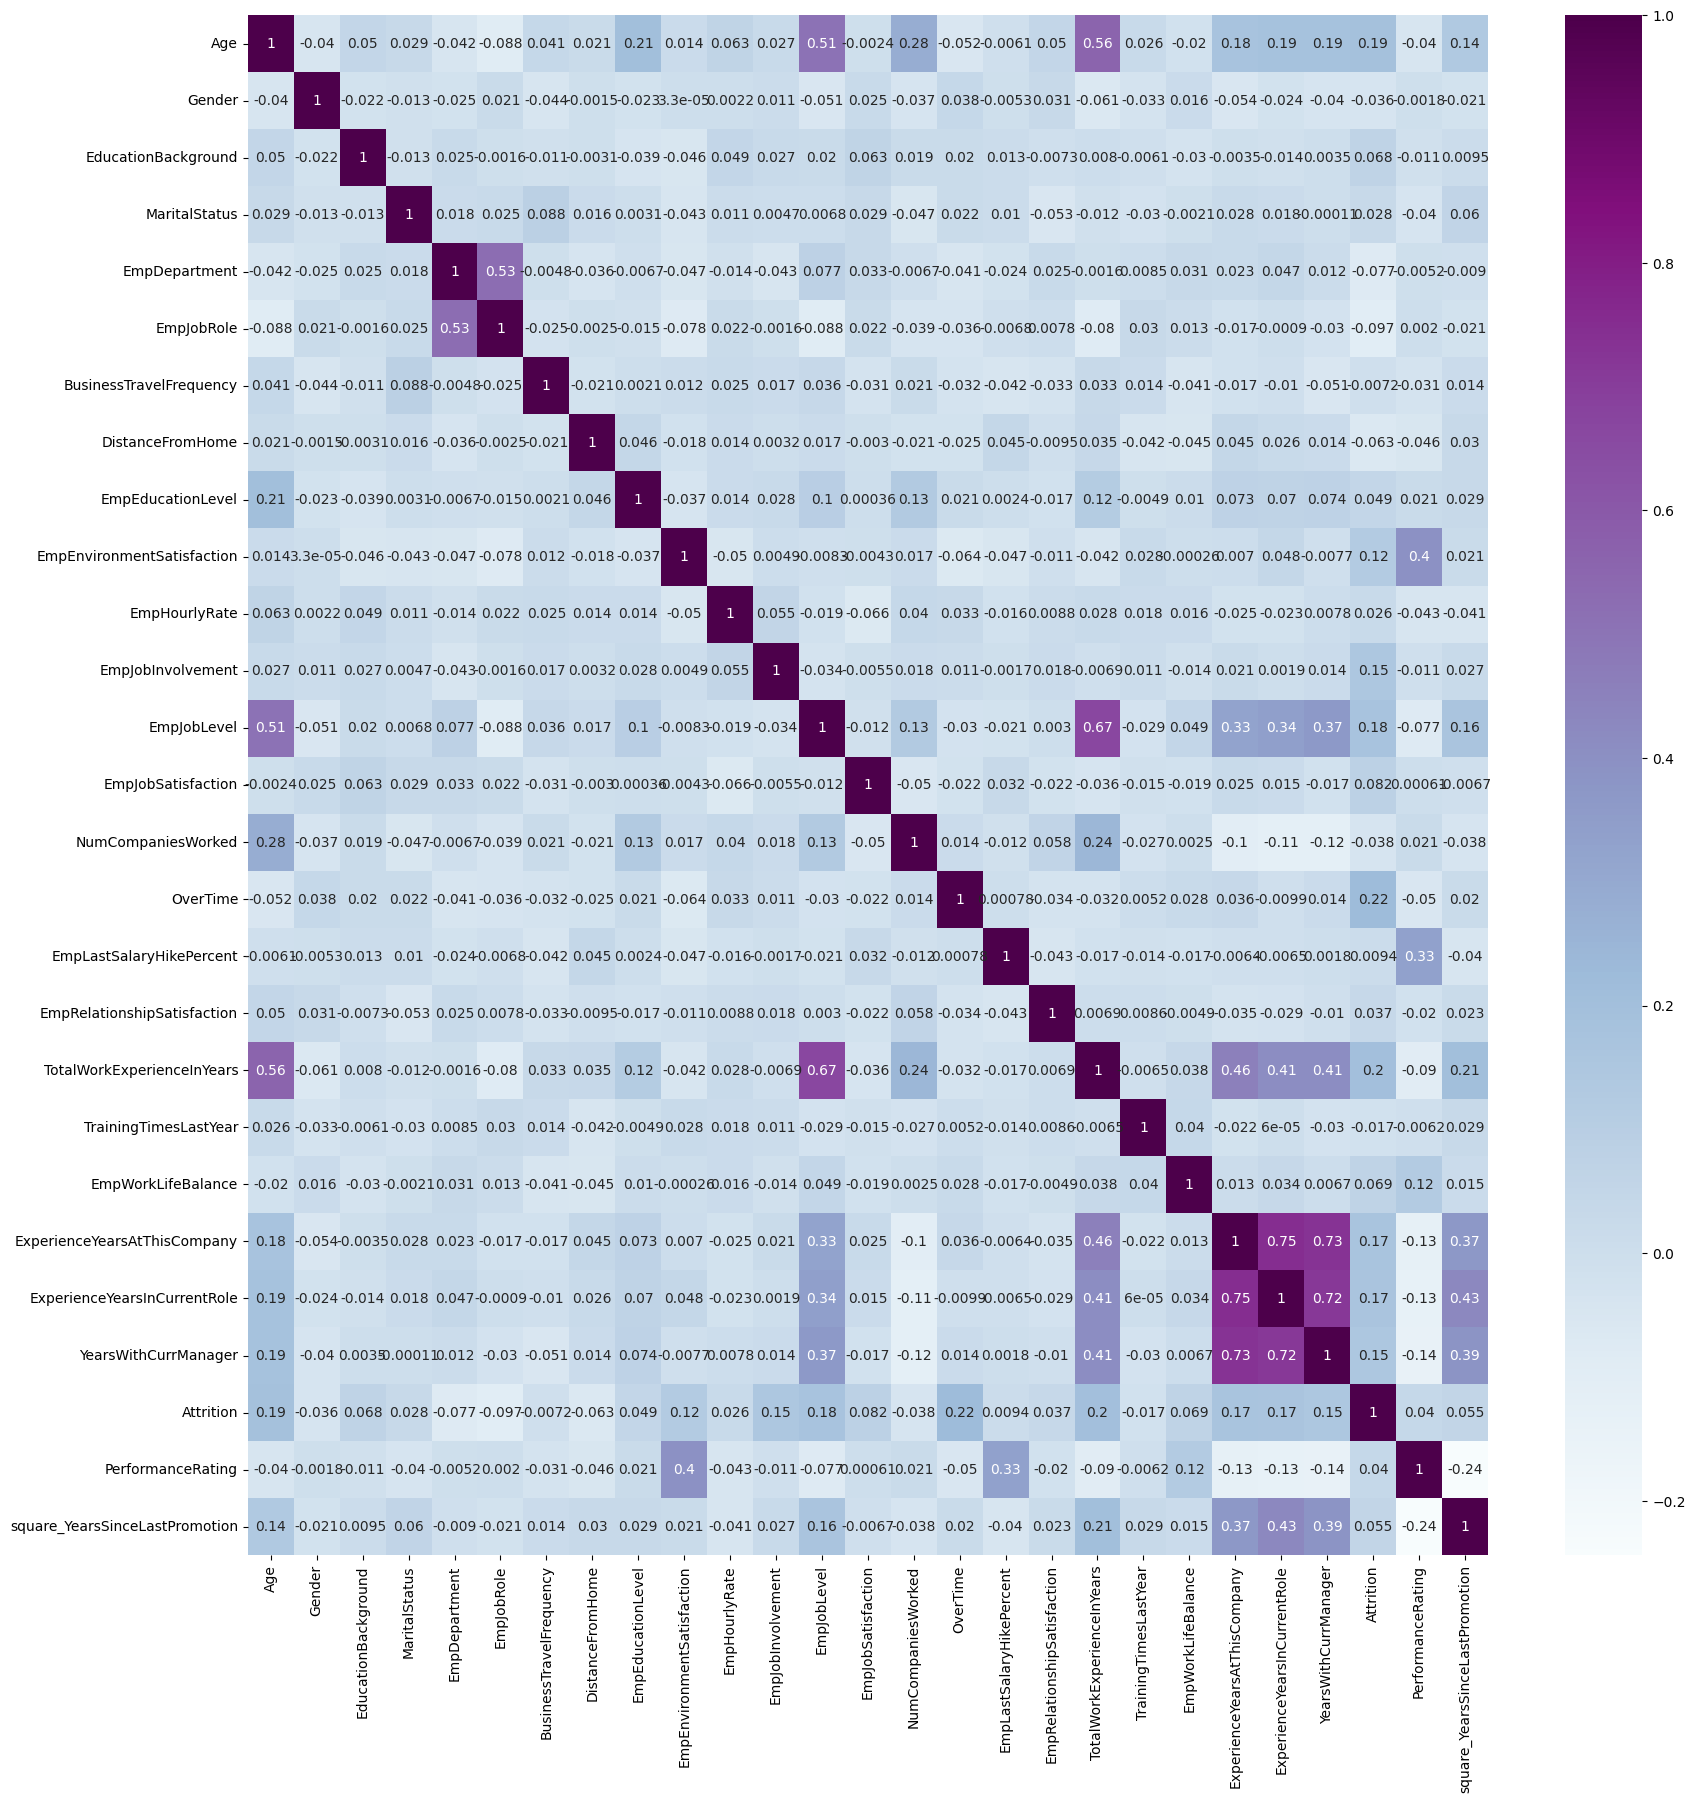

In [128]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

In [129]:
# To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


In [130]:
data.duplicated().sum()

0

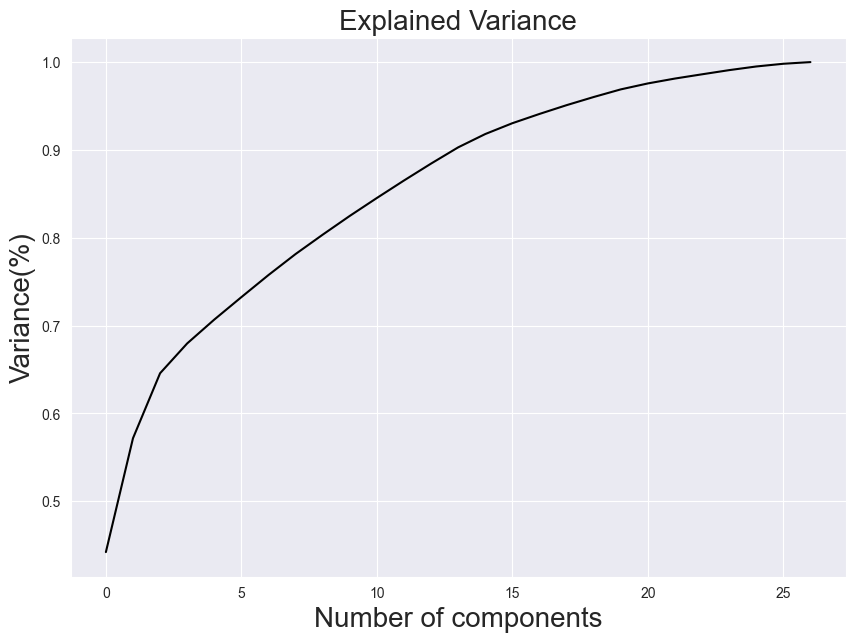

In [131]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(data)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

In [132]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(data)
new_data

array([[-4.47979357e+00, -1.62579961e+00,  1.04815246e+00, ...,
        -5.02890736e-01,  2.28337153e-01, -3.52744289e-01],
       [-4.35607380e+00, -6.82890846e-02,  2.01617388e+00, ...,
        -8.88367129e-01, -2.37235986e-01, -7.10042471e-01],
       [-4.24318059e+00,  2.56096162e+00,  4.36307191e+00, ...,
        -4.34724440e-01, -3.56723825e-01,  6.46996038e-01],
       ...,
       [ 1.64245087e+00, -1.73309807e+00,  3.13585566e+00, ...,
        -1.70950647e-01,  3.39096853e-01,  1.12605457e+00],
       [ 9.10590984e+00, -2.09875367e+00,  1.48314921e+00, ...,
         6.10226389e-01,  1.08399769e-02, -2.99560396e-01],
       [-4.36428097e+00,  5.98213577e+00, -2.10105411e+00, ...,
         6.48347080e-01, -7.17937795e-03, -2.95697975e-02]])

In [133]:
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=data.PerformanceRating

principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


In [134]:
principle_df.to_csv('employee_performance_preprocessed_data.csv')

# Reading new preprocess csv file
df = pd.read_csv('employee_performance_preprocessed_data.csv')

# Get first five rows 
df.head()

,Unnamed: 0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


In [135]:
data = pd.read_csv('employee_performance_preprocessed_data.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


In [136]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [137]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894


In [138]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

In [140]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20)

In [142]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2097, 25), (525, 25), (2097,), (525,))

In [143]:
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 96.51883643299952
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.99      0.94      0.97       728
           3       0.91      0.98      0.95       654
           4       0.99      0.98      0.98       715

    accuracy                           0.97      2097
   macro avg       0.97      0.97      0.96      2097
weighted avg       0.97      0.97      0.97      2097



In [145]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("Prcision Score:", precision_score(svc_test_predict, y_test, average='weighted')*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 93.9047619047619
Prcision Score: 94.33431268125915
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.93      0.96       195
           3       0.86      0.95      0.90       155
           4       0.98      0.94      0.96       175

    accuracy                           0.94       525
   macro avg       0.94      0.94      0.94       525
weighted avg       0.94      0.94      0.94       525



In [146]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
pd.crosstab(svc_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,181,14,0
3,3,148,4
4,0,11,164


In [148]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(X_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)

In [149]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       701
           4       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



In [150]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Precision Score:", precision_score(rf_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 96.0
Precision Score: 96.16924568269127
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.97      0.96      0.96       186
           3       0.91      0.98      0.94       162
           4       1.00      0.95      0.97       177

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



In [151]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [152]:
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [153]:
# Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[2.29723287e-04, 9.99758473e-01, 1.18036184e-05],
       [6.22575328e-06, 9.99566350e-01, 4.27424561e-04],
       [9.74087121e-01, 2.58272308e-02, 8.56486232e-05],
       ...,
       [9.87049603e-01, 1.29479770e-02, 2.41996136e-06],
       [8.32503066e-01, 1.66680491e-01, 8.16443312e-04],
       [1.97623542e-22, 1.68167360e-10, 1.00000000e+00]])

In [154]:
# Prediction on test data
mlp_test_predict = model.predict(X_test)

# Prediction on training data
mlp_train_predict = model.predict(X_train)

In [155]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 98.99856938483548
Classification report of training:
               precision    recall  f1-score   support

           2       1.00      0.97      0.99       711
           3       0.97      1.00      0.98       680
           4       1.00      1.00      1.00       706

    accuracy                           0.99      2097
   macro avg       0.99      0.99      0.99      2097
weighted avg       0.99      0.99      0.99      2097



In [157]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Precision Score:",precision_score(mlp_test_predict, y_test, average='weighted')*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 95.23809523809523
Precision Score: 95.55724555047789
Classification report of testing:
               precision    recall  f1-score   support

           2       0.98      0.95      0.97       189
           3       0.88      0.97      0.93       157
           4       0.99      0.93      0.96       179

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.96      0.95      0.95       525



In [158]:
pd.crosstab(mlp_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,180,9,0
3,3,153,1
4,1,11,167


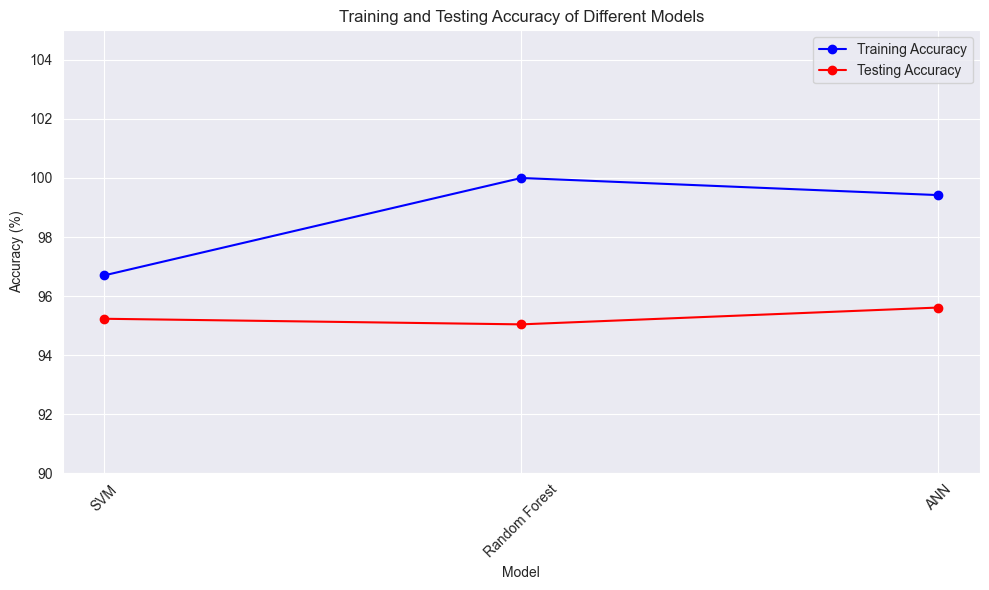

In [159]:
import matplotlib.pyplot as plt

# Model names
models = ['SVM', 'Random Forest', 'ANN']

# Training accuracies
training_accuracies = [96.70, 100, 99.42]

# Testing accuracies
testing_accuracies = [95.23, 95.04, 95.61]

# Plotting
plt.figure(figsize=(10, 6))

# Plot training accuracies
plt.plot(models, training_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')

# Plot testing accuracies
plt.plot(models, testing_accuracies, marker='o', linestyle='-', color='r', label='Testing Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy of Different Models')
plt.ylim(90, 105)  # Setting y-axis limit
plt.legend()
plt.grid(True)  # Add grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [160]:
import pickle

file = open('mlp_classifier_model.pkl','wb')
pickle.dump(model,file)